# Example BFN-QG SSH mapping 
## from SWOT-like data in GULFSTREAM region

In [1]:
import numpy as np
import pylab as plt
import sys, os 
import xarray as xr 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pydssa.class_ssh_mapping as sm

## 1. Set config file

In [3]:
my_config_file = "Example_SSHmapping2_BFNQG_from_SWOT_Gulfstream-config.py"

## 2. Create an ssh mapping instance

In [4]:
my_bfnqg_mapping = sm.ssh_mapping(config_file = my_config_file) 

## 4. Run the BFN-QG mapping 

In [5]:
sys.path.insert(1, '../pydssa/func_ssh_mapping/func_ssh_mapping_bfnqg') 

In [6]:
my_bfnqg_mapping.run_bfnqg()

* for sat swot :
 satellite : swot 
 kind : swot_simulator 
 path : ../data/SSH_obs/ 
 name : 2020a_SSH_mapping_NATL60_karin_swot.nc
2012-11-03 15:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121103_15h00.nc
2012-11-04 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121104_06h00.nc
2012-11-04 15:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121104_15h00.nc
2012-11-04 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121104_18h00.nc
2012-11-05 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121105_06h00.nc
2012-11-05 15:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121105_15h00.nc
2012-11-05 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121105_18h00.nc
2012-11-06 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121106_06h00.nc
2012-11-06 15:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121106_15h00.nc
2012-11-06 18:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121106_18h00.nc
2012-11-07 06:00:00 : ../scratch/Example1/obs_swot_ssh_model_20121107_06h00.n

Projection saved:  ../scratch/Example1/projections_GULFSTREAM_swot_ssh_sigma0_K0.7_window1day,0:00:00_d10_y2012m11d09h0600.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GULFSTREAM_swot_relvort_sigma0_K0.05_window12:00:00_d10_y2012m11d03h1500.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GULFSTREAM_swot_relvort_sigma0_K0.05_window12:00:00_d10_y2012m11d04h0600.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GULFSTREAM_swot_relvort_sigma0_K0.05_window12:00:00_d10_y2012m11d04h1500.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GULFSTREAM_swot_relvort_sigma0_K0.05_window12:00:00_d10_y2012m11d04h1800.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GULFSTREAM_swot_relvort_sigma0_K0.05_window12:00:00_d10_y2012m11d05h0600.pic
projections have been saved in a previous run :  ../scratch/Example1/projections_GU


* Backward loop 1 *

* Convergence test *
error on this loop: 5.783668274110605e-06

* Forward loop 2 *

* Backward loop 2 *

* Convergence test *
error on this loop: 2.62119714047857e-06

* Forward loop 3 *

* Backward loop 3 *

* Convergence test *
error on this loop: 2.592390133821483e-06

* Forward loop 4 *

* Backward loop 4 *

* Convergence test *
error on this loop: 2.5817665152731243e-06

* End of the BFN loop after 4 iterations *

* Saving last forth loop as outputs for the following dates : *
2012-11-07 00:00:00 / 2012-11-08 00:00:00 / 2012-11-09 00:00:00 / 2012-11-10 00:00:00 / 


## 5. Retrieve and plot the SSH mapping

In [7]:


import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt 

output_directory = "../data/Surf_fields/ssh_reconstruction_bfnqg_2012-11-01-2012-11-10_swot0/"

filelist = sorted(os.listdir(output_directory))

day = 0
for file in filelist: 
    output_bfn = output_directory+file 

    with xr.open_dataset(output_bfn, mask_and_scale=True) as (ds_2):   
            ssh = np.zeros_like(ds_2.ssh)  
            ssh[:,:] = ds_2.ssh[:,:] 
            lon = np.zeros_like(ds_2.nav_lon)
            lon[:,:] = ds_2.nav_lon 
            lat = np.zeros_like(ds_2.nav_lat)
            lat[:,:] = ds_2.nav_lat
    ssh = np.ma.masked_invalid(ssh)
    
    if day == 0:
        ssh_all = np.expand_dims(ssh, axis=0)
    else: 
        ssh_exp = np.expand_dims(ssh, axis=0) 
        ssh_all = np.append(ssh_all, ssh_exp ,axis=0)
        
    day +=1
    

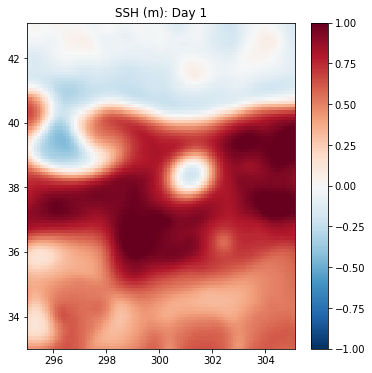

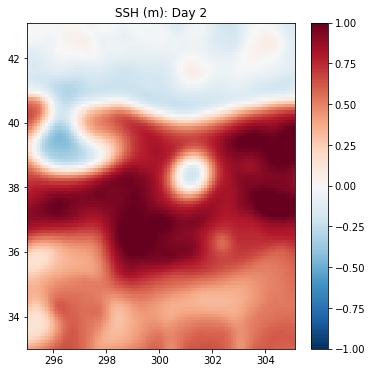

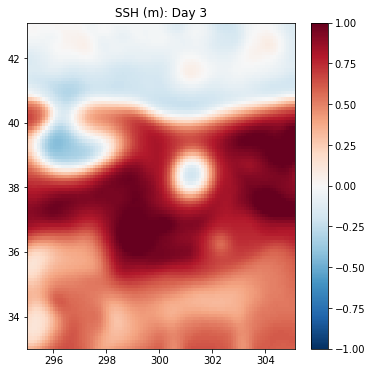

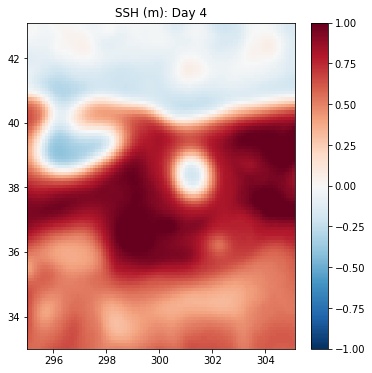

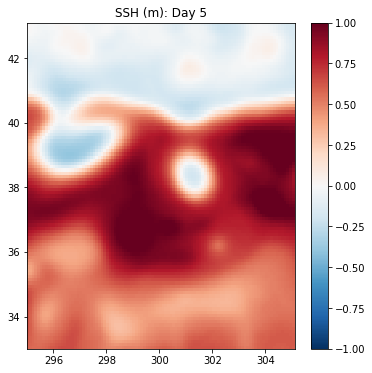

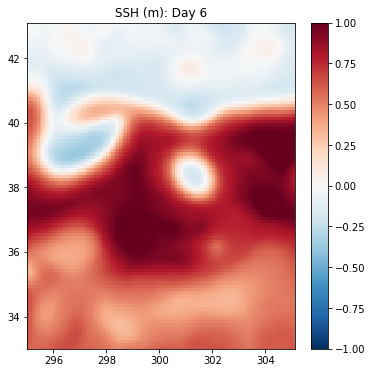

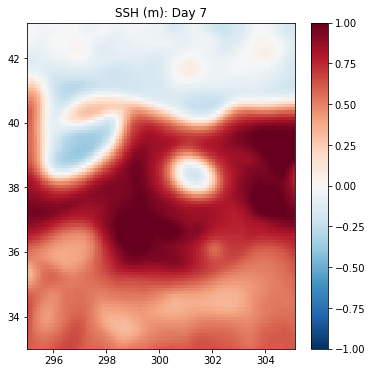

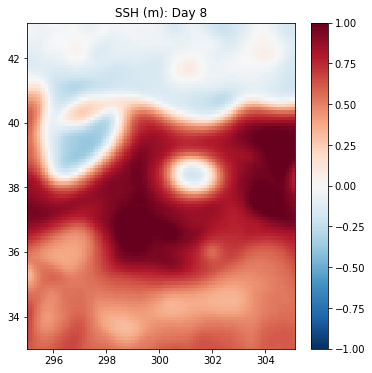

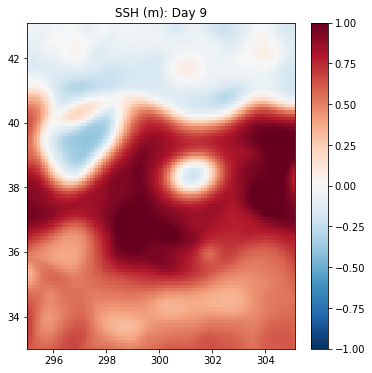

In [8]:
max_var = np.max(np.abs(ssh_all))

i = 0
for file in filelist:
    plt.figure(figsize=(6,6))
    crop = 10
    plt.pcolormesh(lon[crop:-crop,crop:-crop],lat[crop:-crop,crop:-crop],ssh_all[i,crop:-crop,crop:-crop],cmap='RdBu_r')
    plt.clim(-1,1)
    plt.colorbar()
    plt.title('SSH (m): Day '+str(i+1))
    i += 1